## BB84 protocol
Implementation using qiskit

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np

%matplotlib inline

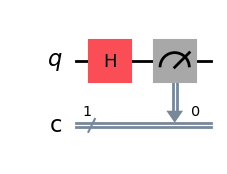

In [47]:
circ_random = QuantumCircuit(1, 1) # one qubit and one classical bit
circ_random.h(0)
circ_random.measure(range(1), range(1))
circ_random.draw(output="mpl");

In [48]:
# Alice generates n random bases, some of which will form a key

n = 100 

# choose backend
backend = Aer.get_backend("qasm_simulator")

# transpile the circuit and run a job
compiled_circuit = transpile(circ_random, backend)
job = backend.run(compiled_circuit, shots=n, memory=True) # memory=True allows to access the bits after the measurement

# get results
bits_alice = [int(q) for q in job.result().get_memory()]
print(bits_alice)

[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [49]:
# Alice and Bob choose at random the bases in which they will operate

job = backend.run(compiled_circuit, shots=n, memory=True)
basis_alice = [int(q) for q in job.result().get_memory()]
print(basis_alice)

job = backend.run(compiled_circuit, shots=n, memory=True)
basis_bob = [int(q) for q in job.result().get_memory()]
print(basis_bob)

[0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0]
[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1]


In [50]:
# Alice sends each bit in her string as a qubit
bits_bob = []

for i in range(n):
    circ_sent = QuantumCircuit(1, 1)
    if bits_alice[i]:
        circ_sent.x(0)
    if basis_alice[1]:
        circ_sent.h(0)

    # Alice sends the qubit to Bob, and he measures

    if basis_bob[i]:
        circ_sent.h(0)

    circ_sent.measure(0, 0)

    compiled_circ_sent = transpile(circ_sent, backend)
    job = backend.run(compiled_circ_sent, shots=1, memory=True)
    bits_bob.append(int(job.result().get_memory()[0]))

print(bits_bob)

[1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [51]:
# Bob tells Alice the basis he used for this measurement
# Alice confirms which of the basis are correct

key = []

for i in range(i):
    if basis_alice[i] == basis_bob[i]:
        key.append(bits_bob[i])

print("Key length: ", len(key))
print(key)

Key length:  58
[1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0]


In [ ]:
# print bases and bits 
n_bits = 40
print("Alice's bits : ", bits_alice[:n_bits] , " ...")
print("Alice's bases: ", basis_alice[:n_bits], " ...")
print("-" * 150)
print("Bob's   bases: ", basis_bob[:n_bits]  , " ...")
print("Bob's   bits : ", bits_bob[:n_bits]   , " ...")

Alice's bits :  [1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]  ...
Alice's bases:  [0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]  ...
------------------------------------------------------------------------------------------------------------------------------------------------------
Bob's   bases:  [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1]  ...
Bob's   bits :  [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0]  ...


In [64]:
# print obtained keys
keys_idx = np.where(np.array(basis_alice) == np.array(basis_bob))
np.set_printoptions(threshold=100, linewidth=150)
print("Alice's bits:", np.array(bits_alice)[keys_idx])
print("Bob's   bits:", np.array(bits_alice)[keys_idx])

Alice's bits: [0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0]
Bob's   bits: [0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0]
